# Arm Reacher with Continuous Control

---

move a double-jointed arm towards target locations in the [Reacher](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md#reacher) environment. 

---

You can download the environment matching your operation system from one of the following links:
* Linux: [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher_Linux.zip)
* Mac OSX: [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher.app.zip)
* Windows (32-bit): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher_Windows_x86.zip)
* Windows (64-bit): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher_Windows_x86_64.zip)




## 1. Start the Environment

If necessary install following packages: **matplotlib**, **numpy**, **torch**, **unityagents**.


If needed uncoment the following cell and install **matplotlib**

In [1]:
import sys


# !{sys.executable} -m pip install matplotlib

If needed uncoment the following cell and install numpy

In [2]:
# !{sys.executable} -m pip install numpy

If needed uncoment the following cell and install torch. We will build the deep Q-Networks using torch.

In [3]:
#!{sys.executable} -m pip install torch

If needed uncoment the following cell and install unityagents. This package is needed to run the downloaded Unity Environment.

In [4]:
#!{sys.executable} -m pip install unityagents

Import the packages.

In [5]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

from unityagents import UnityEnvironment

from agent import Agent, Brain

seed = 10

Next, we will start the environment!

Before running the code cell below, change the `unityEnvPath` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`


In [6]:
unityEnvPath = 'path/to/Reacher/Environment...'

env = UnityEnvironment(file_name=unityEnvPath,no_graphics=True,seed=seed)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [7]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]


## 2. Examine the State and Action Spaces

Before starting with the training let's examine the environment.

The **state space** is `33` dimensional corresponding to `position, rotation, velocity, angular velocities` of the arm.  
The **actions** `4` dimensional corresponding to `torque applicable to two joints`.  Every entry in the action vector must be a number between `-1` and `1`.

A **reward** of `+0.1` is provided for each step that the agent's hand is in the goal location.

In [8]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
state_size = len(state)
print('States have length:', state_size)
print('States look like:\n', state)


Number of agents: 1
Number of actions: 4
States have length: 33
States look like:
 [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.58052063e-01 -1.00000000e+00
 -7.98051262e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  5.63595533e-01]


## 3. Train your agent

The goal of your agent is to maintain its position at the target location for as many time steps as possible. The environment is solved if an average score of 30 is maintained over 100 episodes.

To solve the environment we use the method of deep deterministic policy gradients (DDPG). The algorithm is implemented in the `Brain` class.  

Now we can define the training function: 

In [9]:
def trainAgent(n_episodes=1000, max_t=1000, startNoise = 0.1, endNoise = 0.01, noiseDecay = 1):
   
    scores_deque = deque(maxlen=100)
    scores_list = []
    max_score = -np.Inf
    
    noise = startNoise/noiseDecay
   
    for i_episode in range(1, n_episodes+1):
       
       
        # Per episode we have to reset the environment.
        env_info = env.reset(train_mode=True)[brain_name]
        # Per episode we have to get the current state.
        states = env_info.vector_observations        
        
        noise = max(endNoise,noise*noiseDecay)
        
        agent.reset()
        scores = np.zeros(num_agents)
        for t in range(max_t):
            actions = agent.act(states,noise)
           
            env_info = env.step(actions)[brain_name]
            # We obtain the next state.
            next_states = env_info.vector_observations
            # We get the reward.
            rewards = env_info.rewards
            # We get the done status.
            dones = env_info.local_done
           
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            scores += rewards
            if np.any(dones):
                break
               
        score = np.mean(scores)        
        scores_deque.append(score)
        scores_list.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score))
        if i_episode % 100 == 0:
            torch.save(agentBrain.actorLocal.state_dict(), 'checkpoint_actor.pth')
            torch.save(agentBrain.criticLocal.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))  
#        if np.mean(scores_deque) > 30:
#            torch.save(agentBrain.actorLocal.state_dict(), 'checkpoint_actor.pth')
#            torch.save(agentBrain.criticLocal.state_dict(), 'checkpoint_critic.pth')
#            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))  
#            print('\n\nEnvironment solved in ',i_episode,' episodes')
#            break
    return scores_list



We first create an instance of the `Brain` class and adjust the parameters. Then we create an instance of the agent itself.

In [10]:
agentBrain = Brain(stateSize=state_size, actionSize=action_size, 
                 gamma = 0.99,
                 actorLearningRate = 2e-4,   
                 criticLearningRate = 2e-4,  
                 actorSoftHardUpdatePace = 5e-3, 
                 criticSoftHardUpdatePace = 5e-3,       
                 dnnUpdatePace = 4, 
                 bufferSize = int(1e6),
                 batchSize = 128,
                 batchEpochs = 1,
                 weightDecay = 0,
                 seed = seed)
 
agent = Agent(agentBrain)

Start the trainig

In [11]:
scores = trainAgent() 

Episode 1	Average Score: 0.00	Score: 0.00
Episode 2	Average Score: 0.21	Score: 0.43
Episode 3	Average Score: 0.42	Score: 0.82
Episode 4	Average Score: 0.40	Score: 0.37
Episode 5	Average Score: 0.34	Score: 0.06
Episode 6	Average Score: 0.42	Score: 0.85
Episode 7	Average Score: 0.50	Score: 0.98
Episode 8	Average Score: 0.46	Score: 0.14
Episode 9	Average Score: 0.46	Score: 0.46
Episode 10	Average Score: 0.48	Score: 0.67
Episode 11	Average Score: 0.45	Score: 0.16
Episode 12	Average Score: 0.44	Score: 0.37
Episode 13	Average Score: 0.44	Score: 0.47
Episode 14	Average Score: 0.47	Score: 0.79
Episode 15	Average Score: 0.46	Score: 0.33
Episode 16	Average Score: 0.47	Score: 0.66
Episode 17	Average Score: 0.52	Score: 1.21
Episode 18	Average Score: 0.60	Score: 2.02
Episode 19	Average Score: 0.68	Score: 2.09
Episode 20	Average Score: 0.65	Score: 0.11
Episode 21	Average Score: 0.66	Score: 0.86
Episode 22	Average Score: 0.67	Score: 0.81
Episode 23	Average Score: 0.66	Score: 0.62
Episode 24	Average S

Episode 189	Average Score: 5.10	Score: 6.79
Episode 190	Average Score: 5.14	Score: 6.46
Episode 191	Average Score: 5.12	Score: 1.56
Episode 192	Average Score: 5.18	Score: 9.58
Episode 193	Average Score: 5.22	Score: 6.91
Episode 194	Average Score: 5.28	Score: 7.44
Episode 195	Average Score: 5.31	Score: 6.47
Episode 196	Average Score: 5.38	Score: 9.81
Episode 197	Average Score: 5.43	Score: 7.03
Episode 198	Average Score: 5.49	Score: 9.25
Episode 199	Average Score: 5.56	Score: 8.34
Episode 200	Average Score: 5.60	Score: 6.47
Episode 200	Average Score: 5.60
Episode 201	Average Score: 5.68	Score: 11.43
Episode 202	Average Score: 5.71	Score: 7.69
Episode 203	Average Score: 5.74	Score: 6.61
Episode 204	Average Score: 5.78	Score: 8.20
Episode 205	Average Score: 5.80	Score: 4.82
Episode 206	Average Score: 5.83	Score: 5.78
Episode 207	Average Score: 5.87	Score: 9.86
Episode 208	Average Score: 5.92	Score: 7.03
Episode 209	Average Score: 5.97	Score: 9.59
Episode 210	Average Score: 6.02	Score: 7.61

Episode 372	Average Score: 12.02	Score: 16.84
Episode 373	Average Score: 12.07	Score: 13.61
Episode 374	Average Score: 12.15	Score: 17.57
Episode 375	Average Score: 12.14	Score: 8.42
Episode 376	Average Score: 12.17	Score: 15.90
Episode 377	Average Score: 12.17	Score: 9.21
Episode 378	Average Score: 12.25	Score: 18.03
Episode 379	Average Score: 12.24	Score: 9.71
Episode 380	Average Score: 12.27	Score: 8.92
Episode 381	Average Score: 12.31	Score: 11.49
Episode 382	Average Score: 12.42	Score: 20.88
Episode 383	Average Score: 12.56	Score: 22.22
Episode 384	Average Score: 12.58	Score: 10.15
Episode 385	Average Score: 12.67	Score: 19.57
Episode 386	Average Score: 12.70	Score: 11.97
Episode 387	Average Score: 12.70	Score: 10.32
Episode 388	Average Score: 12.98	Score: 39.27
Episode 389	Average Score: 12.98	Score: 11.26
Episode 390	Average Score: 13.07	Score: 18.15
Episode 391	Average Score: 13.06	Score: 8.96
Episode 392	Average Score: 13.13	Score: 11.62
Episode 393	Average Score: 13.21	Score:

Episode 549	Average Score: 20.20	Score: 21.79
Episode 550	Average Score: 20.37	Score: 34.86
Episode 551	Average Score: 20.32	Score: 21.85
Episode 552	Average Score: 20.45	Score: 30.04
Episode 553	Average Score: 20.65	Score: 31.50
Episode 554	Average Score: 20.74	Score: 24.92
Episode 555	Average Score: 20.74	Score: 24.45
Episode 556	Average Score: 20.90	Score: 27.11
Episode 557	Average Score: 21.07	Score: 29.21
Episode 558	Average Score: 21.11	Score: 38.58
Episode 559	Average Score: 21.19	Score: 28.02
Episode 560	Average Score: 21.34	Score: 28.65
Episode 561	Average Score: 21.41	Score: 22.17
Episode 562	Average Score: 21.55	Score: 30.88
Episode 563	Average Score: 21.68	Score: 22.51
Episode 564	Average Score: 21.69	Score: 21.16
Episode 565	Average Score: 21.72	Score: 21.72
Episode 566	Average Score: 21.85	Score: 30.23
Episode 567	Average Score: 21.74	Score: 27.21
Episode 568	Average Score: 21.69	Score: 17.13
Episode 569	Average Score: 21.76	Score: 30.02
Episode 570	Average Score: 21.83	S

Episode 726	Average Score: 33.43	Score: 31.14
Episode 727	Average Score: 33.46	Score: 32.15
Episode 728	Average Score: 33.48	Score: 33.48
Episode 729	Average Score: 33.54	Score: 35.69
Episode 730	Average Score: 33.59	Score: 34.16
Episode 731	Average Score: 33.69	Score: 39.48
Episode 732	Average Score: 33.78	Score: 36.84
Episode 733	Average Score: 33.86	Score: 39.45
Episode 734	Average Score: 33.91	Score: 36.18
Episode 735	Average Score: 34.00	Score: 37.86
Episode 736	Average Score: 34.05	Score: 38.40
Episode 737	Average Score: 34.12	Score: 35.30
Episode 738	Average Score: 34.12	Score: 30.49
Episode 739	Average Score: 34.12	Score: 36.29
Episode 740	Average Score: 34.14	Score: 39.18
Episode 741	Average Score: 34.19	Score: 37.89
Episode 742	Average Score: 34.21	Score: 35.36
Episode 743	Average Score: 34.23	Score: 35.52
Episode 744	Average Score: 34.27	Score: 35.97
Episode 745	Average Score: 34.34	Score: 39.45
Episode 746	Average Score: 34.45	Score: 34.58
Episode 747	Average Score: 34.59	S

Episode 903	Average Score: 38.27	Score: 38.19
Episode 904	Average Score: 38.31	Score: 36.21
Episode 905	Average Score: 38.31	Score: 38.43
Episode 906	Average Score: 38.32	Score: 39.42
Episode 907	Average Score: 38.32	Score: 39.48
Episode 908	Average Score: 38.32	Score: 39.32
Episode 909	Average Score: 38.32	Score: 38.89
Episode 910	Average Score: 38.32	Score: 38.76
Episode 911	Average Score: 38.32	Score: 39.35
Episode 912	Average Score: 38.34	Score: 39.36
Episode 913	Average Score: 38.32	Score: 33.72
Episode 914	Average Score: 38.37	Score: 38.99
Episode 915	Average Score: 38.36	Score: 38.28
Episode 916	Average Score: 38.35	Score: 38.38
Episode 917	Average Score: 38.37	Score: 38.36
Episode 918	Average Score: 38.37	Score: 39.31
Episode 919	Average Score: 38.37	Score: 39.43
Episode 920	Average Score: 38.39	Score: 38.96
Episode 921	Average Score: 38.39	Score: 39.51
Episode 922	Average Score: 38.37	Score: 37.53
Episode 923	Average Score: 38.36	Score: 38.37
Episode 924	Average Score: 38.37	S

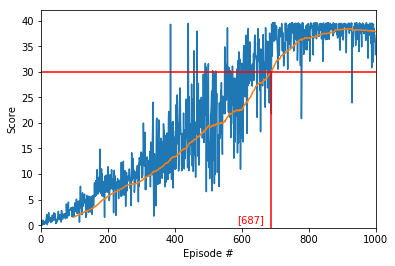

In [14]:
def plotScores(scores,meanOver = 100):
    """
    Plot the scores
    """
    yLimMin = -0.5
    scores = np.array(scores)
    
    runMean = np.convolve(scores, np.ones((meanOver,))/meanOver,mode='valid')[1:]

    mean13 = np.argwhere(runMean>30) + meanOver
    score13 = np.argwhere(scores>30)
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.plot(np.arange(meanOver,len(scores)), runMean)
    
    plt.plot([0, len(scores)],[30,30],'r')
    plt.plot([mean13[0],mean13[0]],[-5,30],'r')
    plt.text(mean13[0]-100,yLimMin+1,str(mean13[0]),color = 'r')
    
    #plt.scatter(score13,scores[score13],color='r')
    
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.xlim([0,len(scores)])
    plt.ylim([yLimMin,42])
    plt.show()


plotScores(scores)

### 5. Watch a Smart Agent!

Now we can load the trained weights from the files and watch the performance of the trained agent.

In [15]:
agentBrain.actorLocal.load_state_dict(torch.load('checkpoint_actor.pth'))
agentBrain.criticLocal.load_state_dict(torch.load('checkpoint_critic.pth'))

env_info = env.reset(train_mode=False)[brain_name]   # reset the environment
states = env_info.vector_observations                # get the current state(s)
scores = np.zeros(num_agents)                        # initialize the score(s)

while True:
    actions = agent.act(states)                      # select the action(s)
    env_info = env.step(actions)[brain_name]         # send the action(s) to the environment
    next_states = env_info.vector_observations       # get the next state(s)
    rewards = env_info.rewards                       # get the reward(s)
    dones = env_info.local_done                      # see if episode has finished
    scores += rewards                                # update the score(s)
    states = next_states                             # roll over the state to next time step
    if np.any(dones):                                # exit loop if episode is finished
        break
   
print("Score: {}".format(scores))                    # print the score(s) of the episode

Score: [39.59999911]


Close the environment

In [16]:
env.close()